In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [472]:
# Correct file path
file_path = 'Churn_Modelling.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the Sample
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7855,7856,15663808,Ifesinachi,666,Germany,Female,59.0,8,152614.51,2,1.0,1.0,188782.30,0
4163,4164,15636396,Jackson,627,France,Female,35.0,7,0.00,2,0.0,1.0,193022.44,0
4484,4485,15595136,Kryukov,645,France,Female,37.0,1,0.00,2,1.0,1.0,68987.55,0
3627,3628,15609475,Ricci,604,Spain,Female,39.0,7,98544.11,1,1.0,1.0,52327.57,0
5081,5082,15757537,Francis,610,France,Female,31.0,6,107784.65,1,1.0,1.0,141137.53,0


In [473]:
# Making a df with the datatypes of the columns
data_types = pd.DataFrame(data.dtypes, columns=['Data Type'])
data_types.reset_index(inplace=True)
data_types.columns = ['Feature', 'Data Type']

# Display the data types
data_types

,Feature,Data Type
0,RowNumber,int64
1,CustomerId,int64
2,Surname,object
3,CreditScore,int64
4,Geography,object
5,Gender,object
6,Age,float64
7,Tenure,int64
8,Balance,float64
9,NumOfProducts,int64


### Data Cleansing

In [474]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Geography         1
Age               1
HasCrCard         1
IsActiveMember    1
dtype: int64

In [475]:
# Copy the df before dropping row
data_copy = data.copy()

In [476]:
# Remove the rows with missing values
data.dropna(subset=['Age', 'Geography', 'HasCrCard', 'IsActiveMember'], inplace = True)

In [477]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 2


In [478]:
# Remove duplicated rows
data.drop_duplicates(inplace = True)

#### We use regression to predict missing value

In [479]:
# Regress other explanatory variables against age

ind_var = data.loc[:, [ "CustomerId", "CreditScore", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]]
ind_var = sm.add_constant(ind_var)
model = sm.OLS(data.loc[:, "Age"], ind_var)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.686
Date:                Sat, 23 Nov 2024   Prob (F-statistic):             0.0132
Time:                        13:49:53   Log-Likelihood:                -37668.
No. Observations:                9996   AIC:                         7.535e+04
Df Residuals:                    9989   BIC:                         7.540e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.8744     22.892      0.737      0.461     -27.999      61.748
CustomerId       1.468e-06   1.46e-06      1.006      0.314   -1.39e-06    4.33e-06
CreditScore        -0.0004      0.001     -0.401      0.688      -0.003       0.002
Tenure             -0.0339      0.036     -0.935      0.350      -0.105       0.037
Balance          3.564e-06   1.76e-06      2.020      0.043    1.05e-07    7.02e-06
NumOfProducts      -0.4388      0.189     -2.318      0.020      -0.810      -0.068
EstimatedSalary -1.286e-06   1.82e-06     -0.705      0.481   -4.86e-06    2.29e-06
==============================================================================
Omnibus:                     1513.483   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2534.947
Skew:                           1.012   Prob(JB):                         0.00
Kurtosis:                       4.410   Cond. No.                     3.43e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [480]:
# Select independent variables with p-value < 0.05 (coefficient is statistically differnet from 0)
selected_ind_var_lst = [result.pvalues.index[i] for i in range(len(result.pvalues)) if result.pvalues[i] < 0.05]
selected_ind_var = data.loc[:, selected_ind_var_lst]
selected_ind_var = sm.add_constant(selected_ind_var)
revised_model = sm.OLS(data.loc[:, "Age"], selected_ind_var)
revised_result = revised_model.fit()

# Check if any coefficients have p-value > 0.05
for var in revised_result.pvalues.index:
    if revised_result.pvalues[var] > 0.05:
        print("Some coefficients have pvalue > 0.05.")
        break
    elif var == revised_result.pvalues.index[-1]:
        print("The model is good.")

revised_result.summary()

The model is good.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.779
Date:                Sat, 23 Nov 2024   Prob (F-statistic):            0.00114
Time:                        13:49:53   Log-Likelihood:                -37670.
No. Observations:                9996   AIC:                         7.535e+04
Df Residuals:                    9993   BIC:                         7.537e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            39.3266      0.370    106.335      0.000      38.602      40.052
Balance        3.533e-06   1.76e-06      2.003      0.045    7.58e-08    6.99e-06
NumOfProducts    -0.4416      0.189     -2.334      0.020      -0.813      -0.071
==============================================================================
Omnibus:                     1513.601   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2534.943
Skew:                           1.012   Prob(JB):                         0.00
Kurtosis:                       4.409   Cond. No.                     3.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [481]:
# Forecast the missing value
missing_data_row = data_copy[data_copy["Age"].isnull() == True]
all_test_data = missing_data_row.loc[:, selected_ind_var_lst].values.tolist()
all_test_data = [[1] + all_test_data[i] for i in range(len(all_test_data))]
pred = revised_result.get_prediction(all_test_data)
predicted_age = [int(pred.predicted_mean[i]) for i in range(len(pred.predicted_mean))]

In [482]:
# Store the predicted age to data
missing_data_row["Age"] = predicted_age
data = pd.concat([data, missing_data_row]).sort_index()

## Data Visualization

### Analysis of Explanatory Variables

In [483]:
# data.describe(include='all')
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9997.000000,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,5001.998500,1.569094e+07,650.506652,38.921079,5.013004,76482.077722,1.530159,0.705512,0.514954,100103.862300,0.203761
std,2886.032253,7.193156e+04,96.620415,10.487896,2.892365,62396.706040,0.581680,0.455835,0.499801,57511.138005,0.402814
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2503.000000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51011.290000,0.000000
50%,5002.000000,1.569073e+07,652.000000,37.000000,5.000000,97188.620000,1.000000,1.000000,1.000000,100236.020000,0.000000
75%,7501.000000,1.575323e+07,717.000000,44.000000,7.000000,127642.440000,2.000000,1.000000,1.000000,149399.700000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


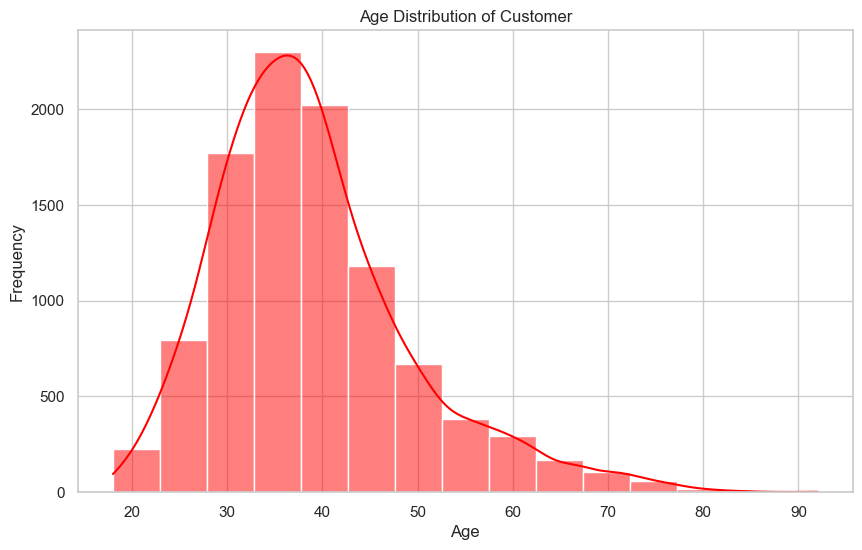

In [484]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins = 15, kde = True, color = 'red')
plt.title('Age Distribution of Customer')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

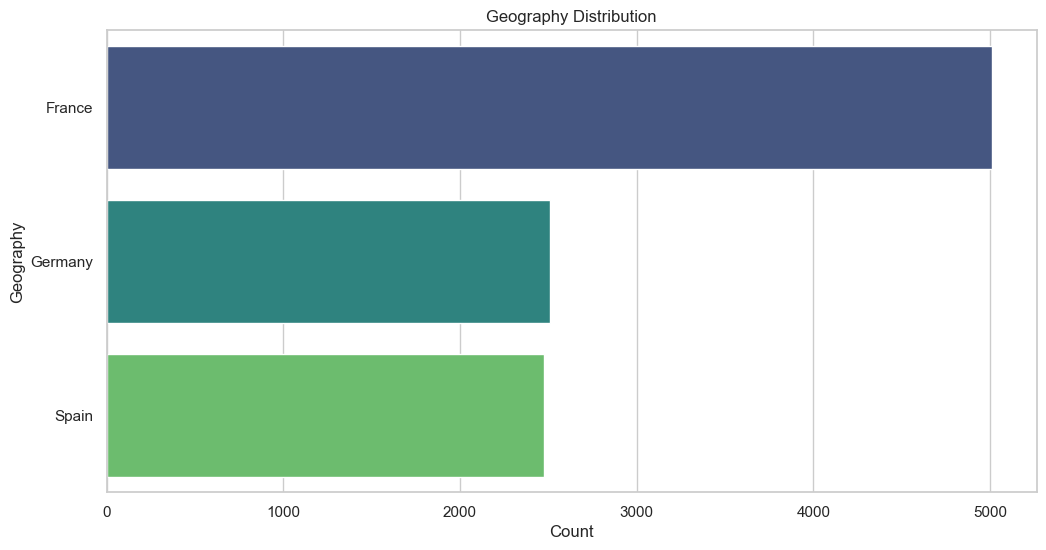

In [485]:
# Count the occurrences of each country
geography_counts = data['Geography'].value_counts()

# Display the customers counts
plt.figure(figsize=(12, 6))
sns.countplot(data = data, y = 'Geography', order = geography_counts.index, palette='viridis')
plt.title('Geography Distribution')
plt.xlabel('Count')
plt.ylabel('Geography')
plt.show()

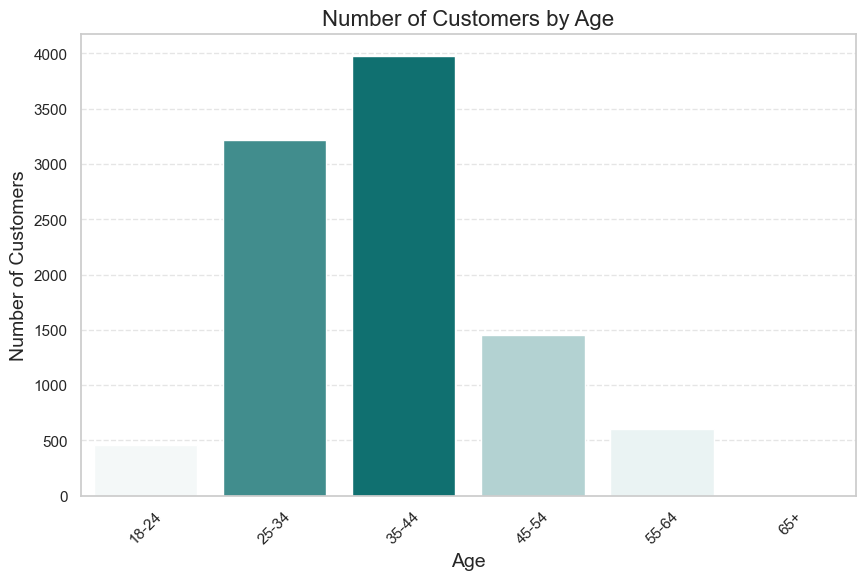

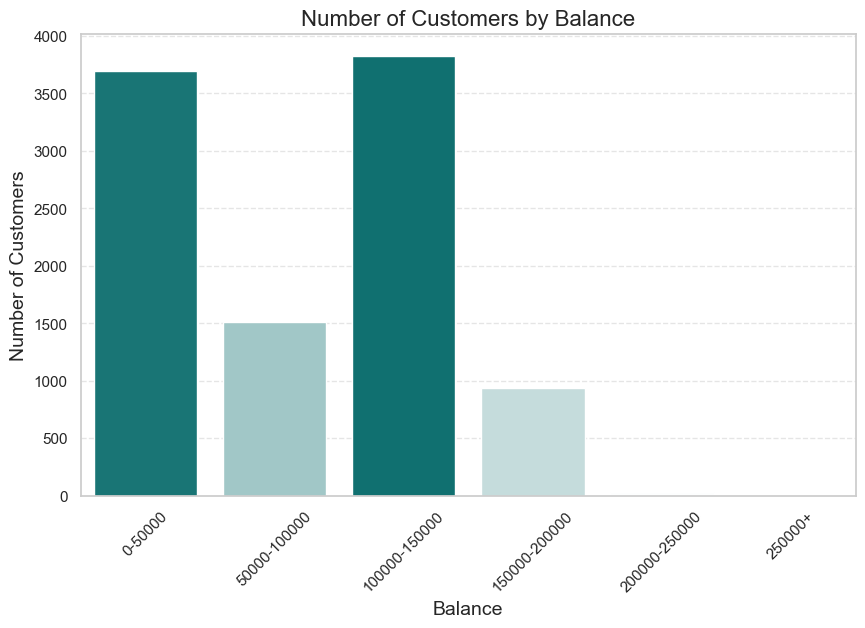

In [486]:
# List of columns to visualize
columns_to_visualize = [
    'Age',
    'Balance',
]

# Set group for each columns
columns_to_visualize = {
    'Age': [[18, 25, 35, 45, 55, 65, 100], ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']],
    'Balance': [[0, 50000, 100000, 150000, 200000, 250000, 300000], ['0-50000', '50000-100000', '100000-150000', '150000-200000', '200000-250000', '250000+']]
} # first element is bins, second is labels

for var in columns_to_visualize:
    
    # Set new group column
    new_col_name = var + "_Group"
    data[new_col_name] = pd.cut(data[var], bins = columns_to_visualize[var][0], labels=columns_to_visualize[var][1], right=False)
    
    # Calculate the number of customers in each group
    group_counts = data[new_col_name].value_counts().sort_index()

    # Normalize the customer counts to use for color intensity
    normalized_counts = (group_counts - group_counts.min()) / (group_counts.max() - group_counts.min())

    # Create a custom color palette using shades of teal and aqua
    base_color = np.array([0, 128, 128])  # Teal base color (R, G, B)
    colors = [
        (base_color + (255 - base_color) * (1 - norm)) / 255
        for norm in normalized_counts
    ]

    # Create a bar plot with the customized colors
    plt.figure(figsize=(10, 6))
    sns.barplot(x=group_counts.index, y=group_counts.values, palette=colors)
    plt.title(f'Number of Customers by {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Number of Customers', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
plt.show()

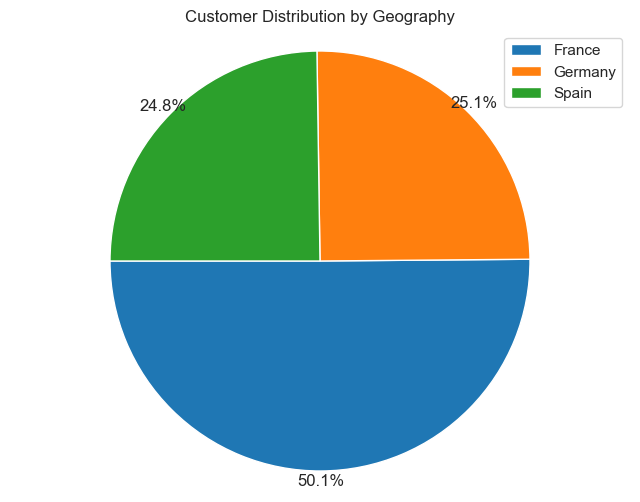

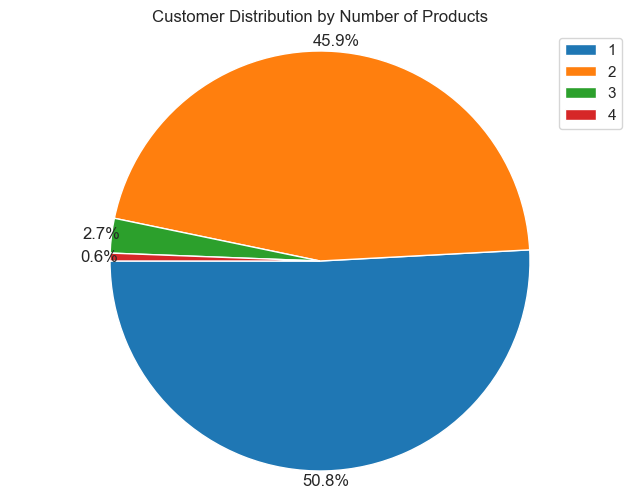

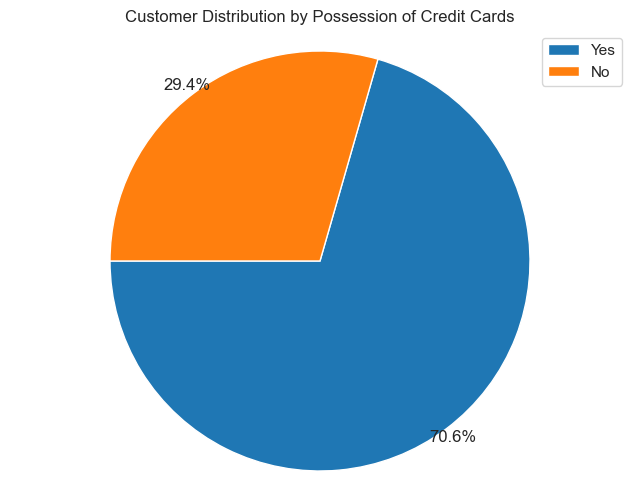

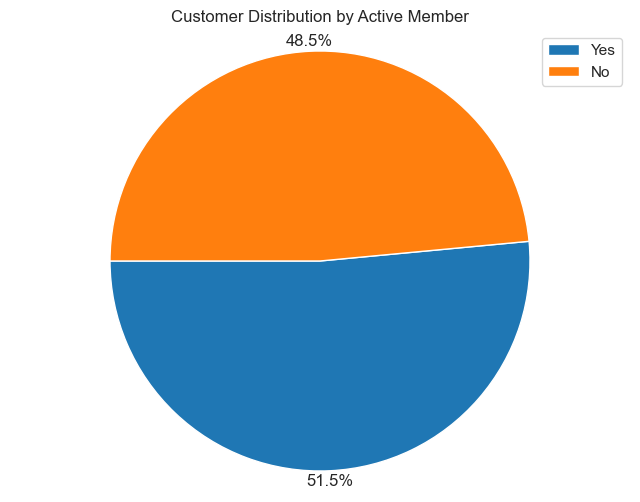

In [487]:
# Set columns to visualize
col_to_visualize = {
    'Geography': 'Geography',
    'NumOfProducts': 'Number of Products',
    'HasCrCard': 'Possession of Credit Cards',
    'IsActiveMember': 'Active Member'
} # value indicates the proper name of the variable

for var in col_to_visualize:

    # Count the customer by variables
    customer_counts = data[var].value_counts()

    # Plotting
    plt.figure(figsize=(8, 6))

    # Using a fresh color palette with four colors
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', colors=colors, startangle=180, pctdistance=1.05, labeldistance = None)
    if var == 'HasCrCard' or var == 'IsActiveMember':
        plt.legend(["Yes", "No"], loc = 'upper right')
    else:
        plt.legend(loc = 'upper right')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

    # Title
    plt.title(f'Customer Distribution by {col_to_visualize[var]}')

# Show the plot
plt.show()

### Distribution Analysis

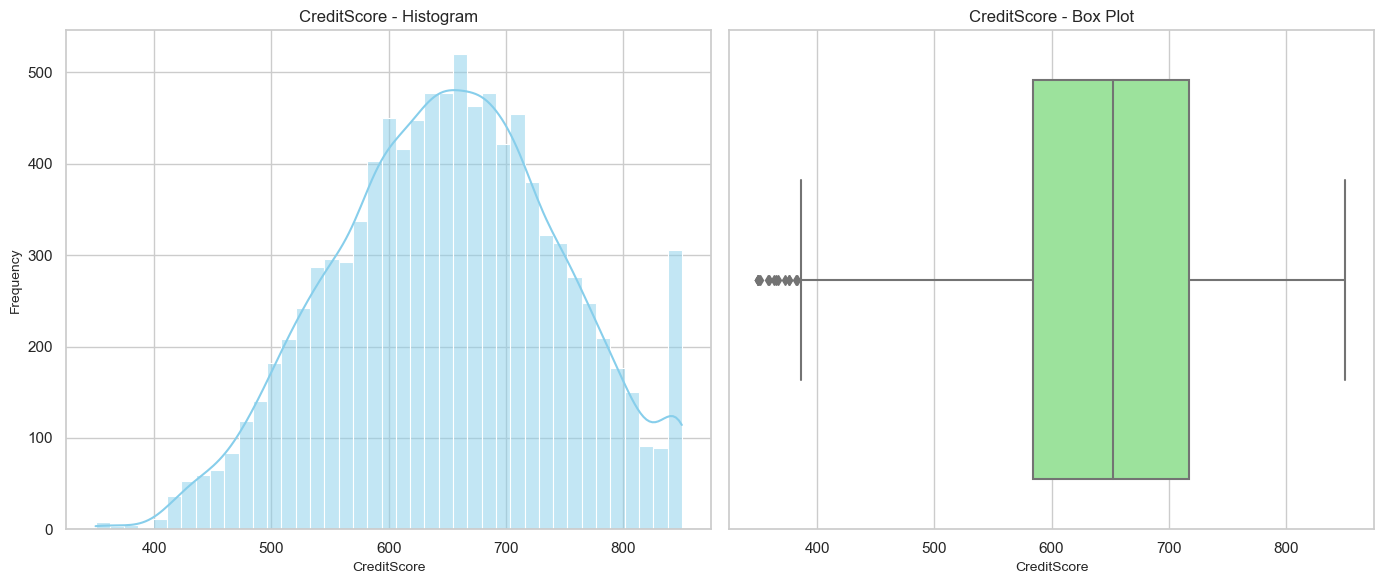

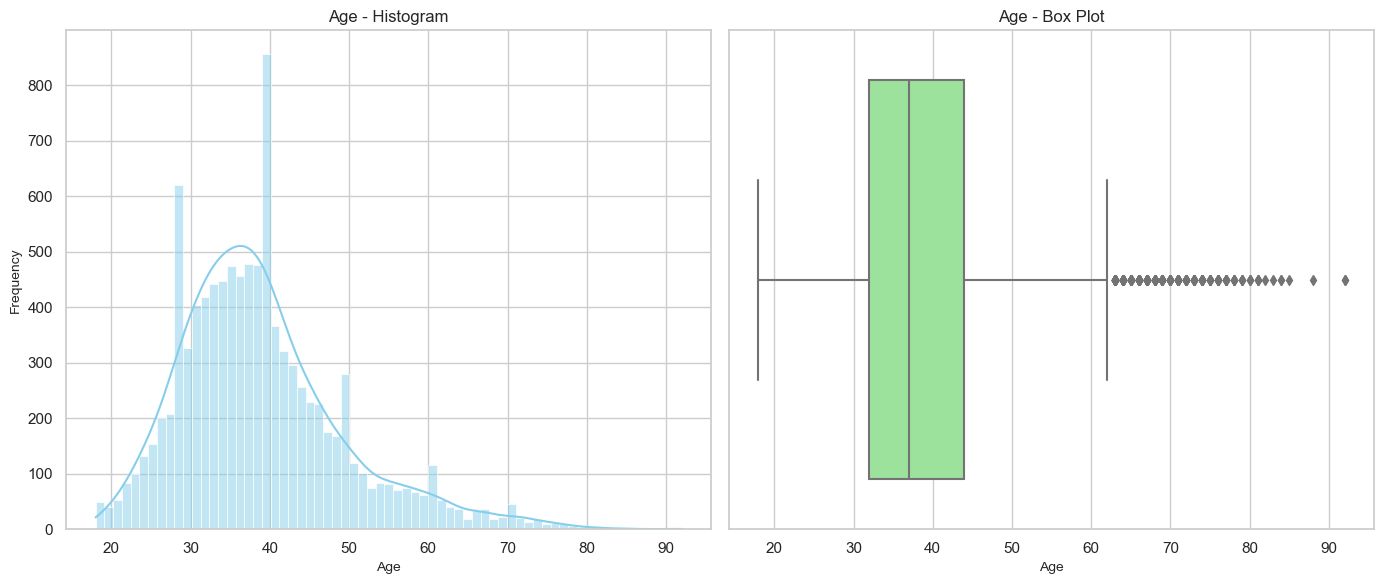

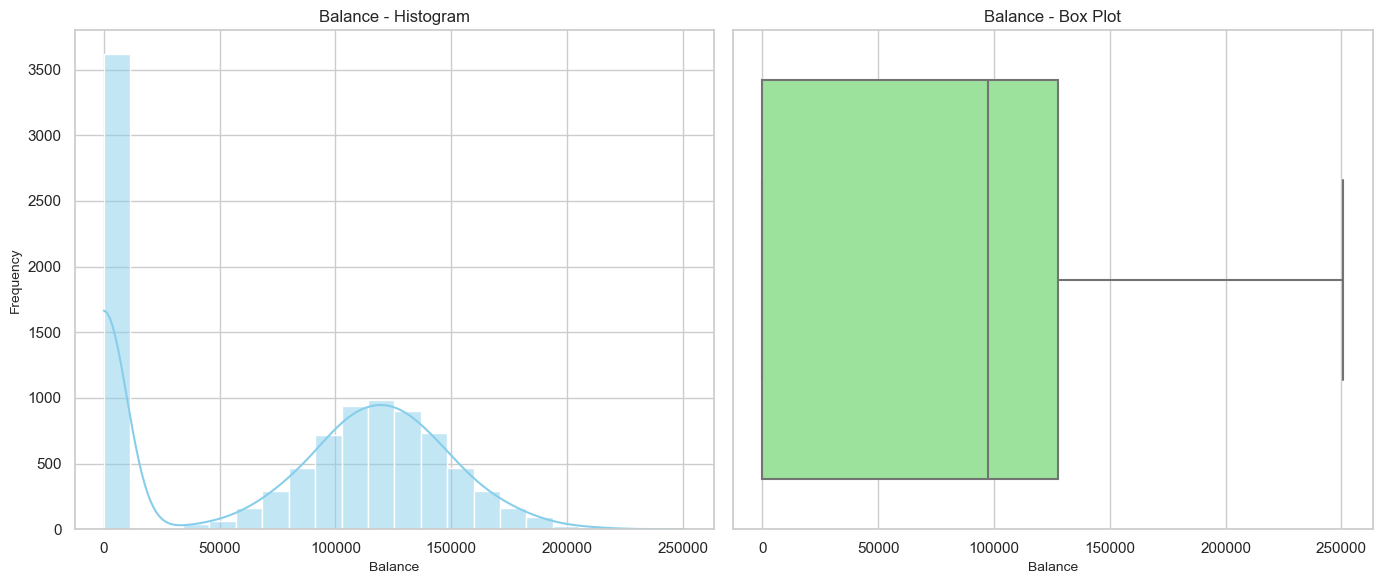

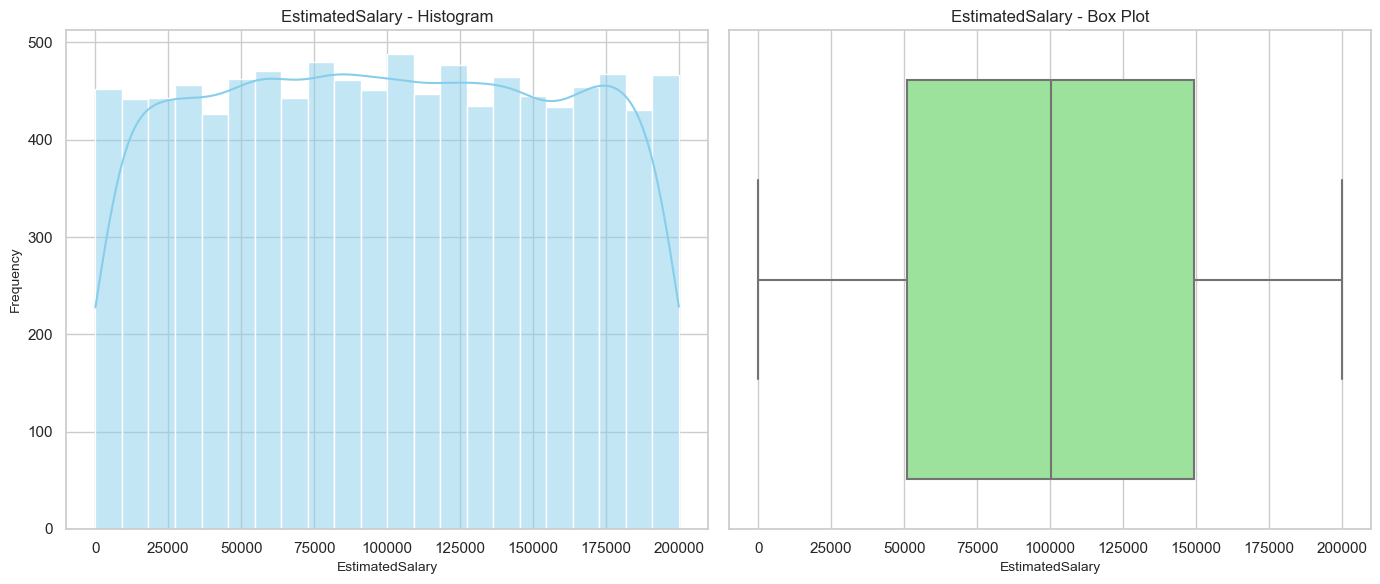

In [488]:
# List of columns to visualize
columns_to_visualize = [
    'CreditScore', 
    'Age',
    'Balance',
    'EstimatedSalary',
]

# Loop through each column and plot histogram and box plot
for column in columns_to_visualize:
    if column in data.columns:  # Check if the column exists in the DataFrame
        plt.figure(figsize=(14, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde = True, color='skyblue')
        plt.title(f'{column} - Histogram', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        
        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'{column} - Box Plot', fontsize=12)
        plt.xlabel(column, fontsize=10)
        
        # Show the plots
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{column}' not found in the DataFrame.")

### Relationship of Explanatory Variables

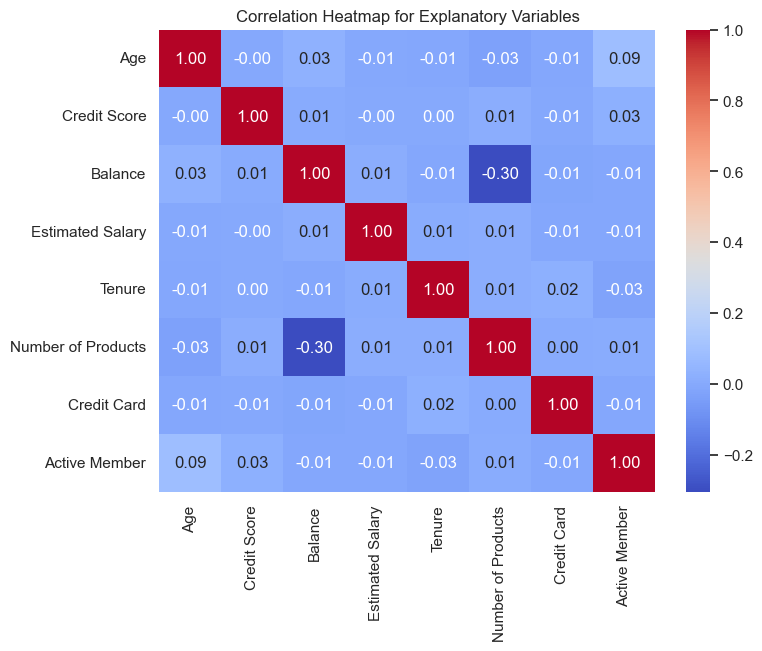

In [489]:
# Calculate correlation
correlation = data[['Age', 'CreditScore', "Balance", 'EstimatedSalary', 'Tenure', "NumOfProducts", "HasCrCard", "IsActiveMember"]].corr()

# Check if the correlation DataFrame is generated correctly
if not correlation.empty:
    # Visualization of the correlation
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
                xticklabels=['Age', 'Credit Score', 'Balance', 'Estimated Salary', 'Tenure', "Number of Products", "Credit Card", "Active Member"], 
                yticklabels=['Age', 'Credit Score', 'Balance', 'Estimated Salary', 'Tenure', "Number of Products", "Credit Card", "Active Member"]
               )
    plt.title('Correlation Heatmap for Explanatory Variables')
    plt.show()
else:
    print("Correlation DataFrame is empty. Please check your data.")

#### We see that there is correlation between number of products and balance. More analysis will therefore be performed on these 2 variables. It is also interesting to see the relationship between country and other explanatory variables.

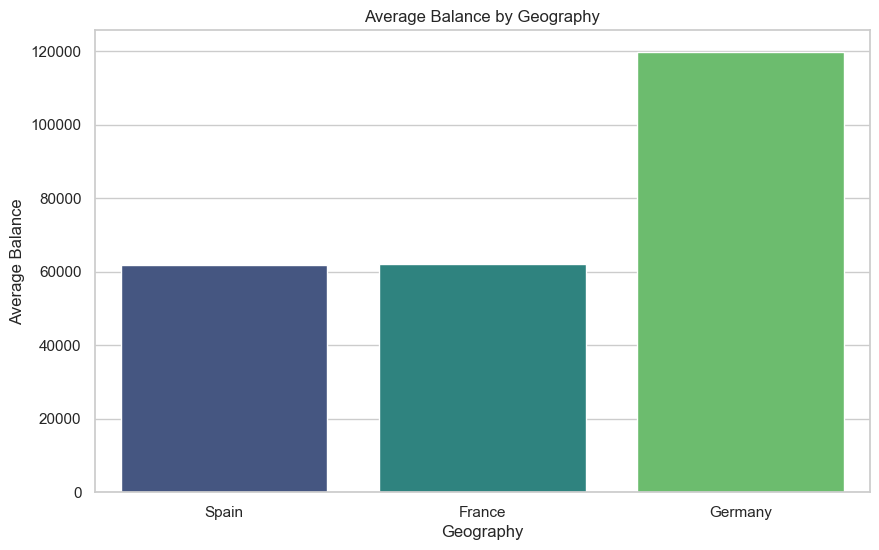

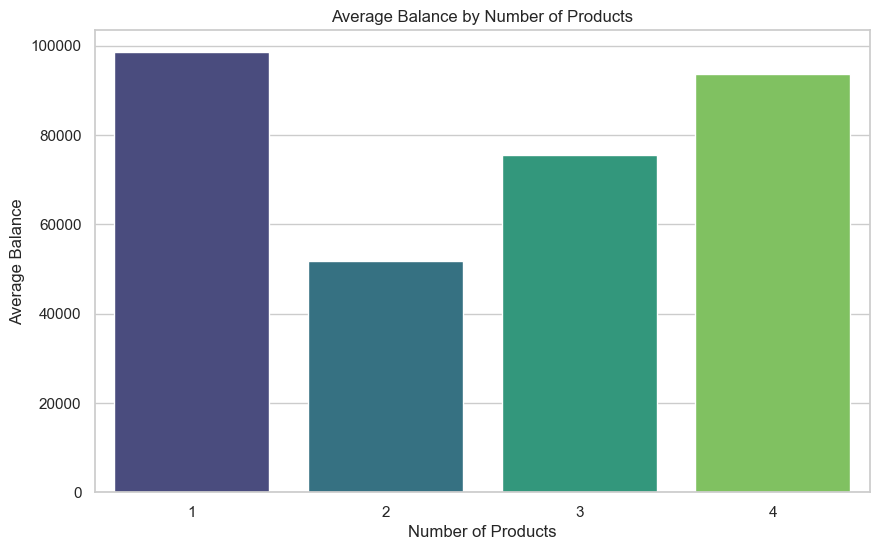

In [490]:
# Set columns to visualize
col_to_visualize = {
    'Geography': 'Geography',
    'NumOfProducts': 'Number of Products'
} # value indicates the proper name of the variable


for var in col_to_visualize:
    
    # Group the data by variable and calculate the average balance
    balance_by_var = data.groupby(var)['Balance'].mean().sort_values()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(y=balance_by_var.values, x=balance_by_var.index, palette='viridis')
    plt.title(f'Average Balance by {col_to_visualize[var]}')
    plt.xlabel(col_to_visualize[var])
    plt.ylabel('Average Balance')

plt.show()

#### Germany has the highest average balance, while the other 2 countries are similar. Customers with only 1 product has the highest average balance, supporting the negative correlation between number of products and balance.

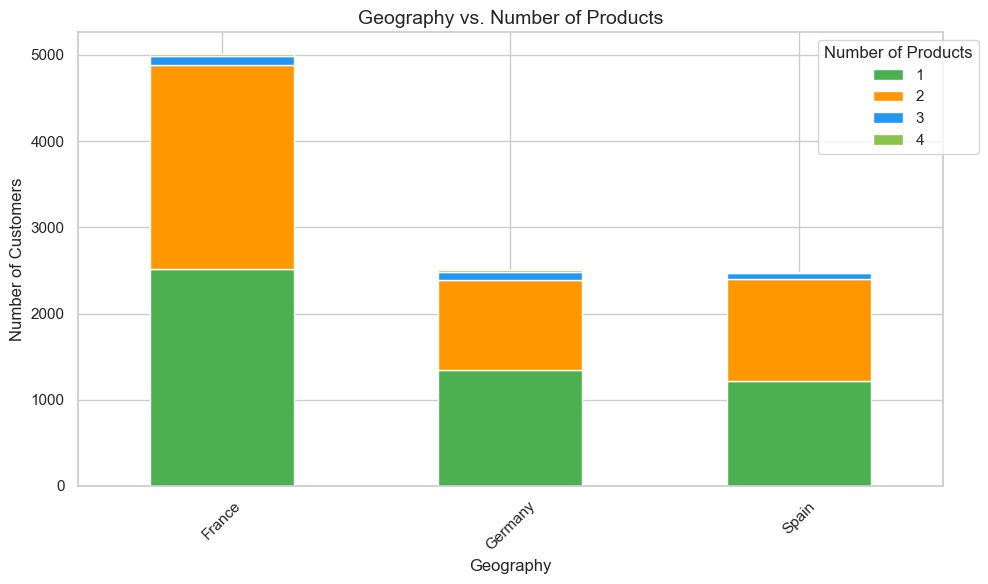

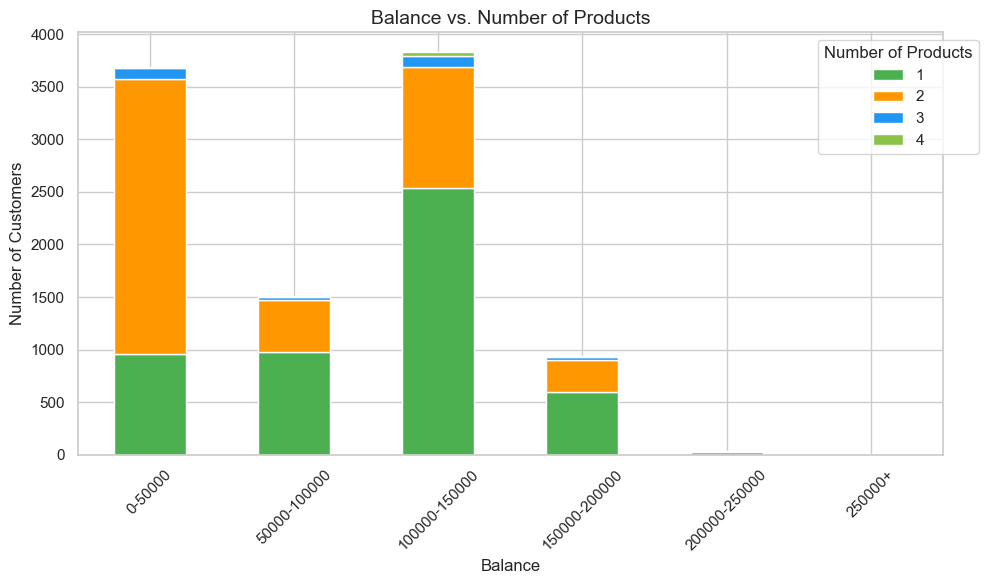

In [491]:
# Set columns to visualize
col_to_visualize = {
    'Geography': 'Geography',
    'Balance_Group': 'Balance'
} # value is the proper name of variable

for var in col_to_visualize:

    # Count the number of customers for each country and number of products they possess
    customer_counts = data.groupby([var, 'NumOfProducts']).size().unstack()

    # Plotting the grouped bar plot
    customer_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4CAF50', '#FF9800', '#2196F3', '#8BC34A'])
    plt.title(f'{col_to_visualize[var]} vs. Number of Products', fontsize=14)
    plt.xlabel(col_to_visualize[var], fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Number of Products', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

#### Customers with hgiher balance mainly have 1 - 2 products only.

#### Now we try to do more analysis on the relationship of other explanatory variables

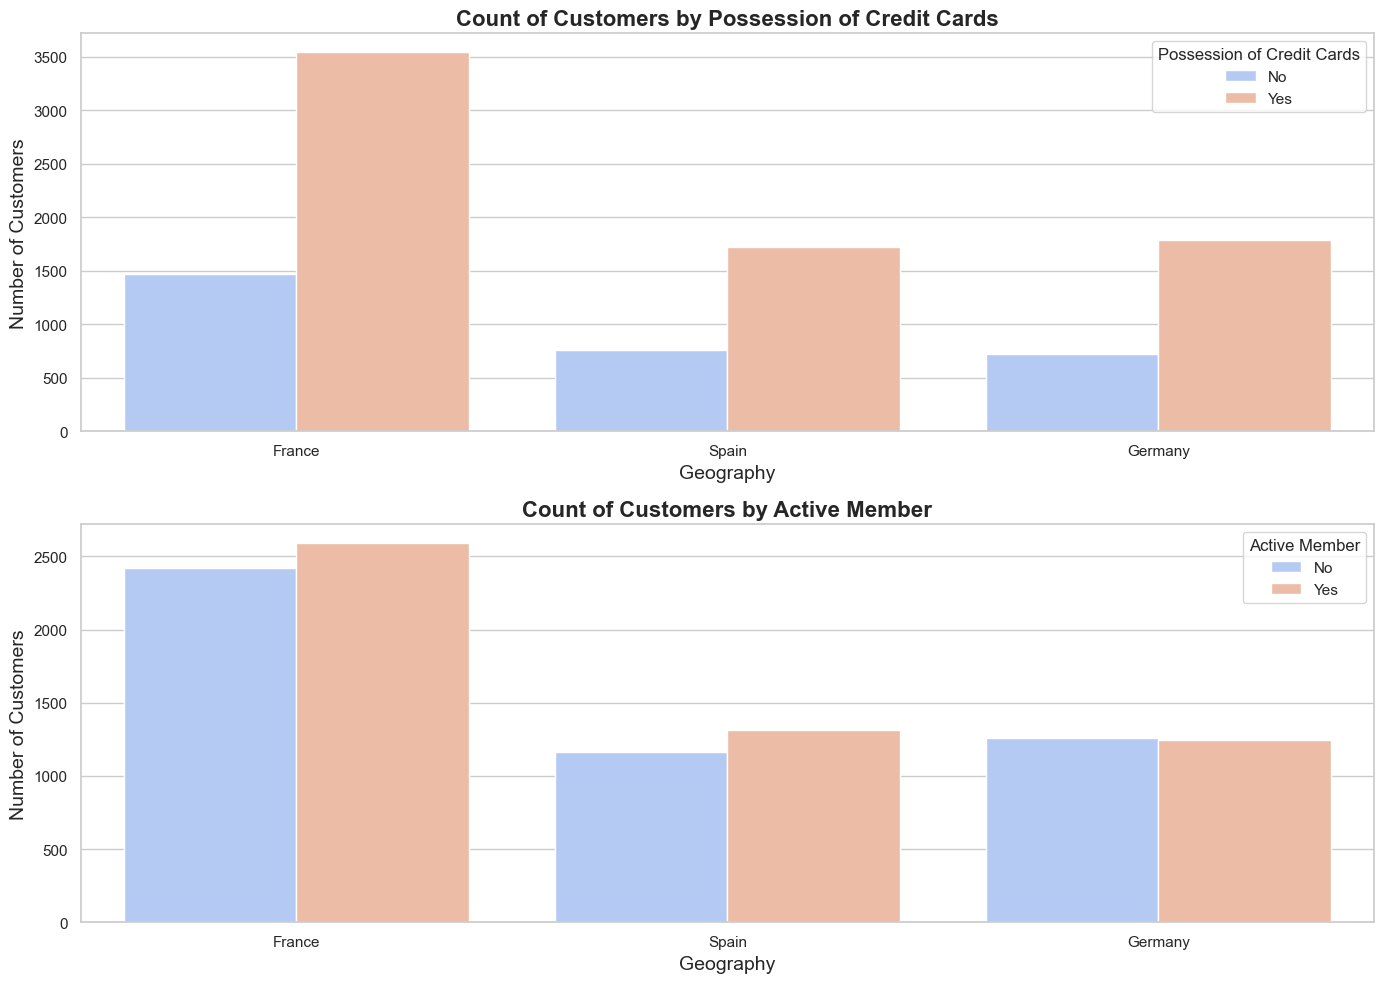

In [492]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure for the plots
plt.figure(figsize=(14, 10))

# Set columns to visualize
col_to_visualize = {
    'HasCrCard': 'Possession of Credit Cards',
    'IsActiveMember': 'Active Member'
} # value is the proper name of variable

for var in col_to_visualize:

    # Count Plot for number of customers by variables
    plt.subplot(2, 1, list(col_to_visualize).index(var) + 1)
    sns.countplot(x = 'Geography', hue = var, data = data, palette = 'coolwarm')
    plt.title(f'Count of Customers by {col_to_visualize[var]}', fontsize=16, fontweight='bold')
    plt.xlabel('Geography', fontsize=14)
    plt.ylabel('Number of Customers', fontsize=14)
    plt.legend(title = col_to_visualize[var], labels = ["No", "Yes"])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

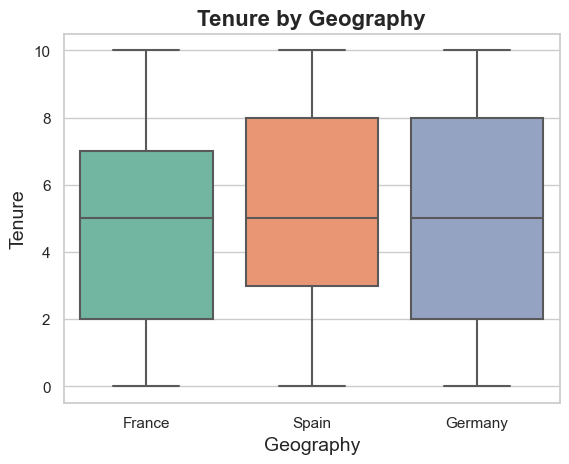

In [493]:
# Box Plot for tenure by geography
sns.boxplot(x='Geography', y='Tenure', data=data, palette='Set2')
plt.title('Tenure by Geography', fontsize=16, fontweight='bold')
plt.xlabel('Geography', fontsize=14)
plt.ylabel('Tenure', fontsize=14)
plt.show()

### Relationship of Explanatory Variables and Response Variables

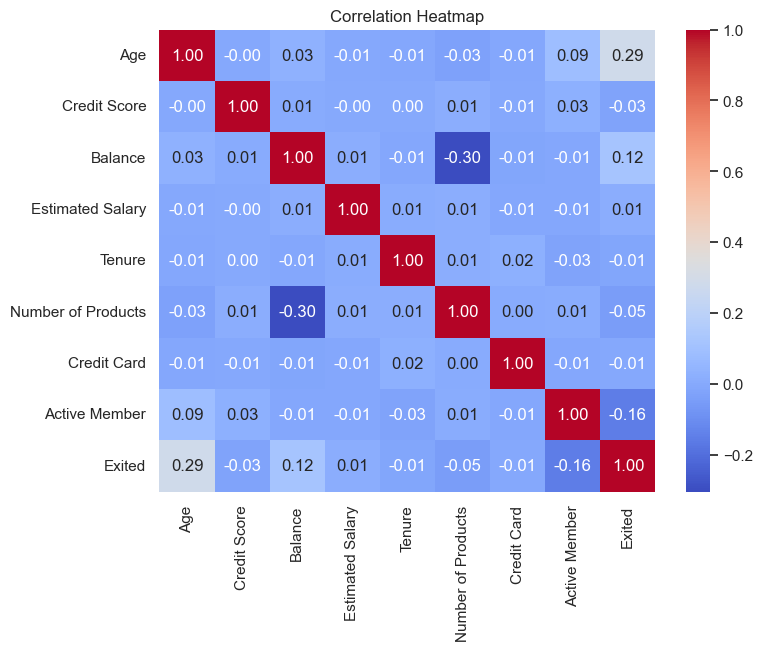

In [494]:
# Calculate correlation
correlation = data[['Age', 'CreditScore', "Balance", 'EstimatedSalary', 'Tenure', "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]].corr()

# Check if the correlation DataFrame is generated correctly
if not correlation.empty:
    
    # Visualization of the correlation
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
                xticklabels=['Age', 'Credit Score', 'Balance', 'Estimated Salary', 'Tenure', "Number of Products", "Credit Card", "Active Member",'Exited'], 
                yticklabels=['Age', 'Credit Score', 'Balance', 'Estimated Salary', 'Tenure', "Number of Products", "Credit Card", "Active Member",'Exited']
               )
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Correlation DataFrame is empty. Please check your data.")

#### We first focus on relationship between age, balance, and active member because of high correlation

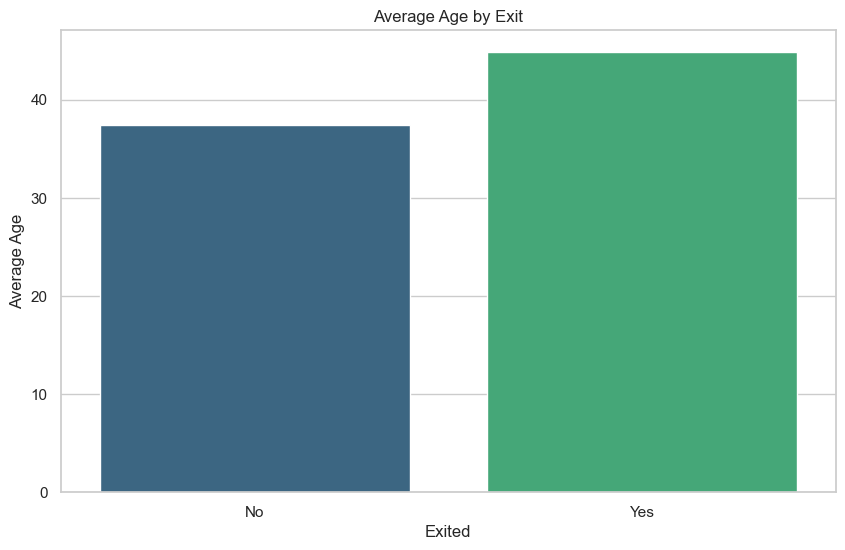

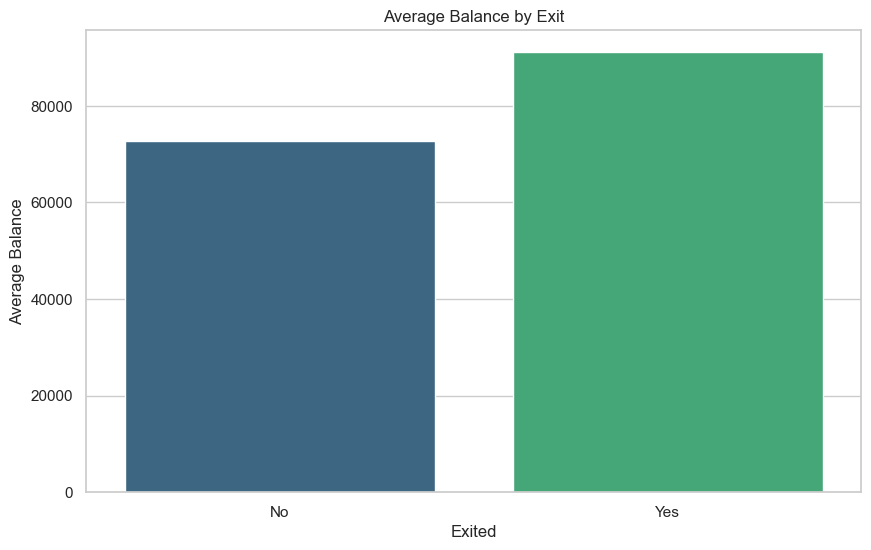

In [495]:
# Set columns to visualize
col_to_visualize = [
    'Age',
    'Balance'
]

for var in col_to_visualize:

    # Group the data by Exit and calculate the average
    var_by_exit = data.groupby('Exited')[var].mean().sort_values()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(y=var_by_exit.values, x=var_by_exit.index, palette='viridis')
    plt.title(f'Average {var} by Exit')
    plt.xlabel('Exited')
    plt.xticks([0, 1], ["No", "Yes"])
    plt.ylabel(f'Average {var}')
    
plt.show()

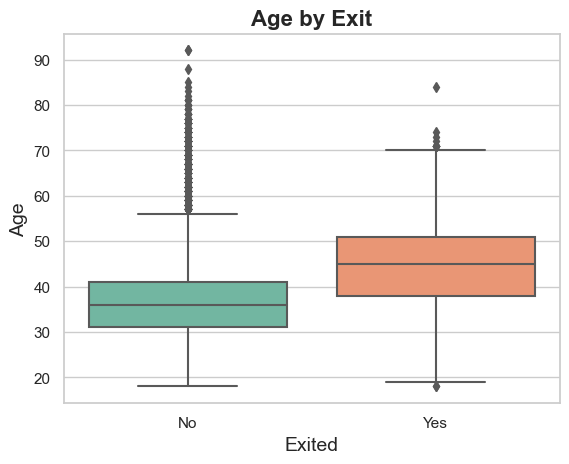

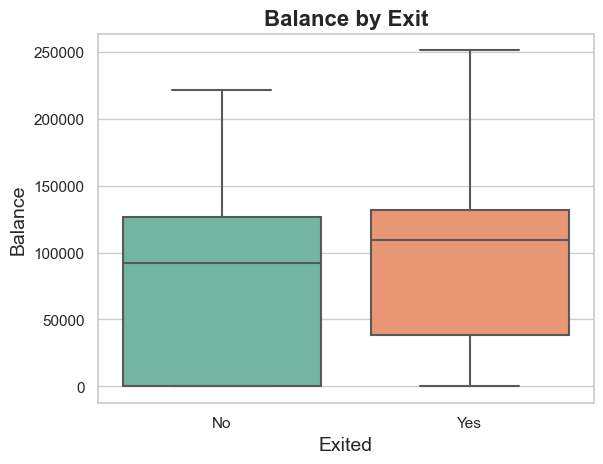

In [496]:
# Set columns to visualize
col_to_visualize = [
    'Age',
    'Balance'
]

for var in col_to_visualize:
    
    # Box Plot by Exit
    sns.boxplot(x='Exited', y=var, data=data, palette='Set2')
    plt.title(f'{var} by Exit', fontsize=16, fontweight='bold')
    plt.xlabel('Exited', fontsize=14)
    plt.xticks([0, 1], ["No", "Yes"])
    plt.ylabel(var, fontsize=14)
    plt.show()

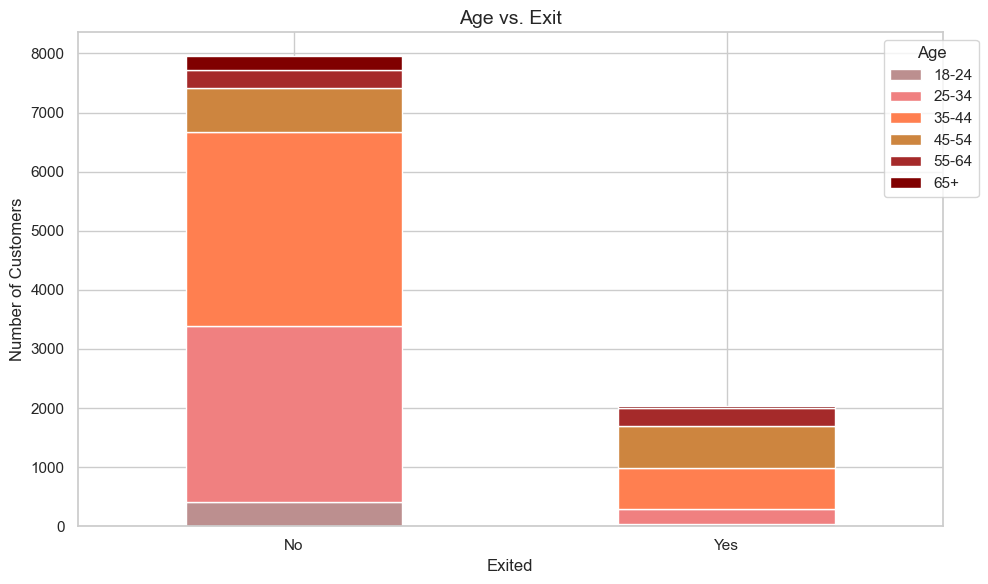

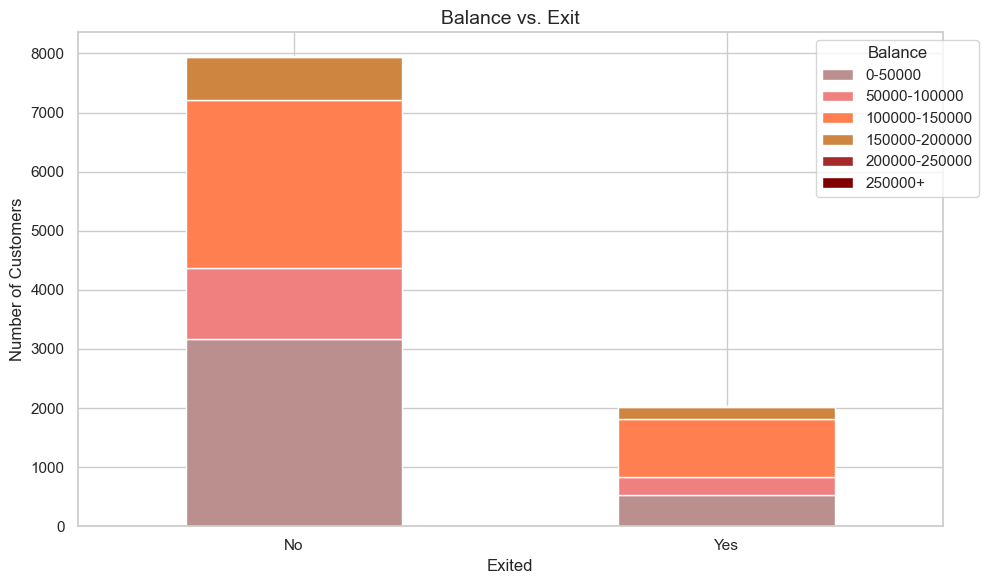

In [497]:
# Set columns to visualize
col_to_visualize = [
    'Age_Group',
    'Balance_Group'
]

for var in col_to_visualize:

    # Count the number of customers by exit and variables
    customer_counts = data.groupby(['Exited', var]).size().unstack()

    # Plotting the grouped bar plot
    customer_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['rosybrown', 'lightcoral', 'coral', 'peru', 'brown', 'maroon'])
    plt.title(f'{var[: -6]} vs. Exit', fontsize=14)
    plt.xlabel('Exited', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks([0, 1], ["No", "Yes"], rotation=0)
    plt.legend(title=var[: -6], bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
plt.show()


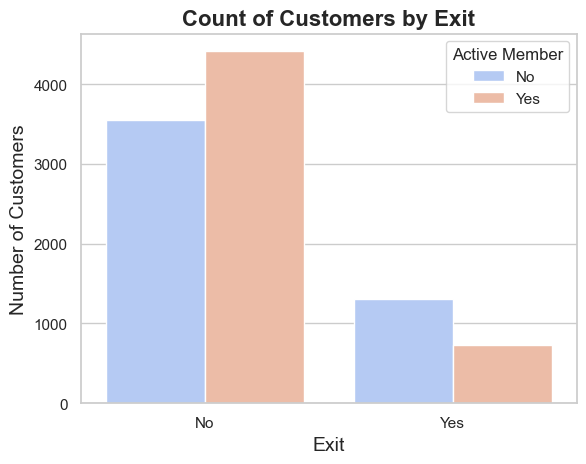

In [498]:
# Count Plot for number of customers by exit and whether they are active member
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = data, palette = 'coolwarm')
plt.title('Count of Customers by Exit', fontsize=16, fontweight='bold')
plt.xlabel('Exit', fontsize=14)
plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend(title = 'Active Member', labels = ["No", "Yes"])
plt.show()

#### Now we also consider relationship of exit or not with other variables

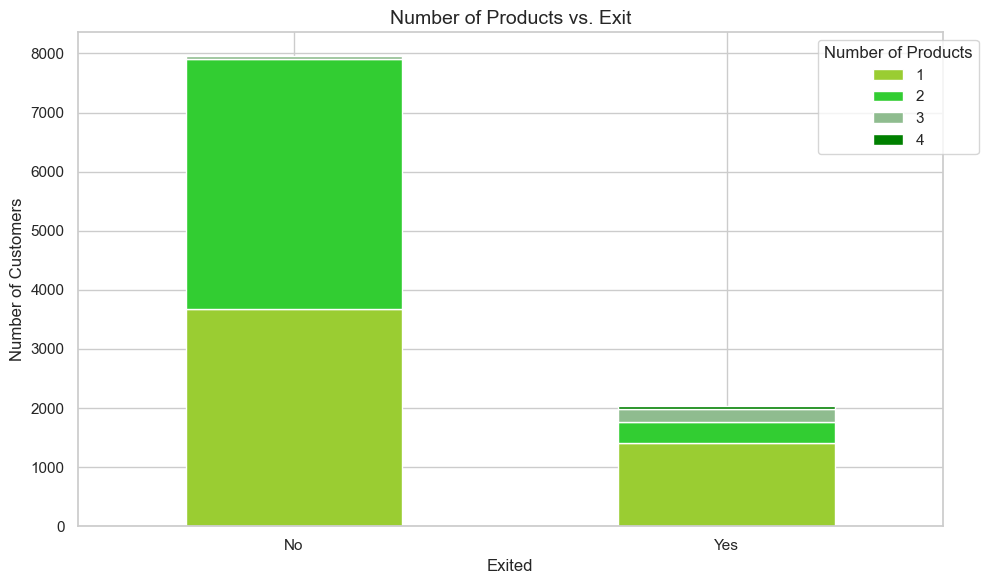

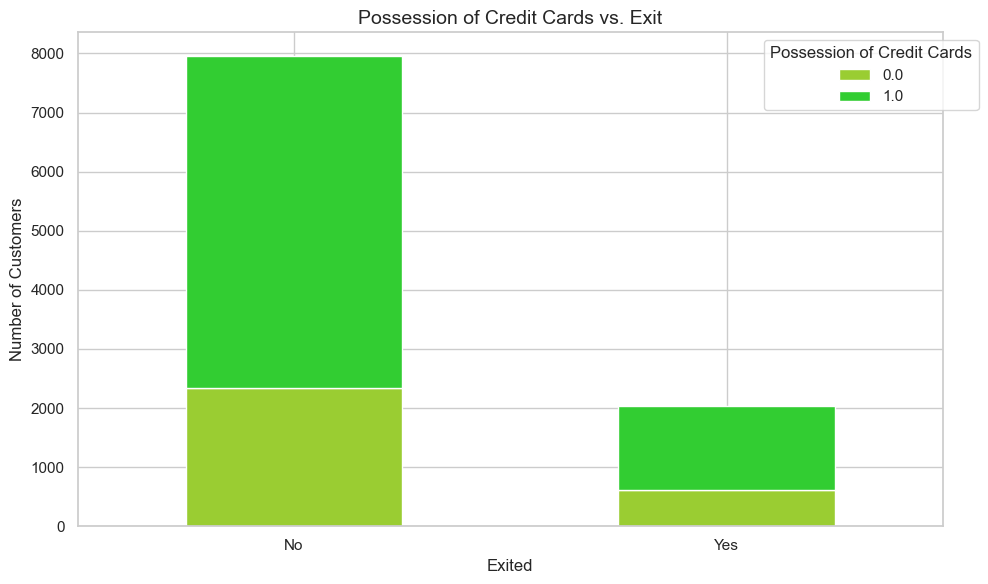

In [499]:
# Set columns to visualize
col_to_visualize = {
    "NumOfProducts": "Number of Products",
    "HasCrCard": "Possession of Credit Cards"
}

for var in col_to_visualize:

    # Count the number of customers by exit and variables
    customer_counts = data.groupby(['Exited', var]).size().unstack()

    # Plotting the grouped bar plot
    customer_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['yellowgreen', 'limegreen', 'darkseagreen', 'green', 'darkolivegreen'])
    plt.title(f'{col_to_visualize[var]} vs. Exit', fontsize=14)
    plt.xlabel('Exited', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks([0, 1], ["No", "Yes"], rotation=0)
    plt.legend(title=col_to_visualize[var], bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
plt.show()

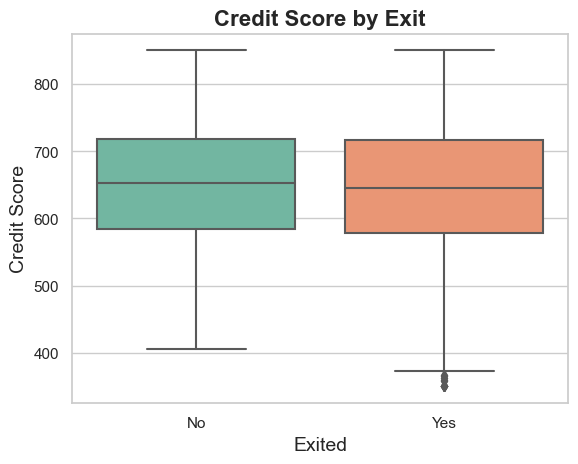

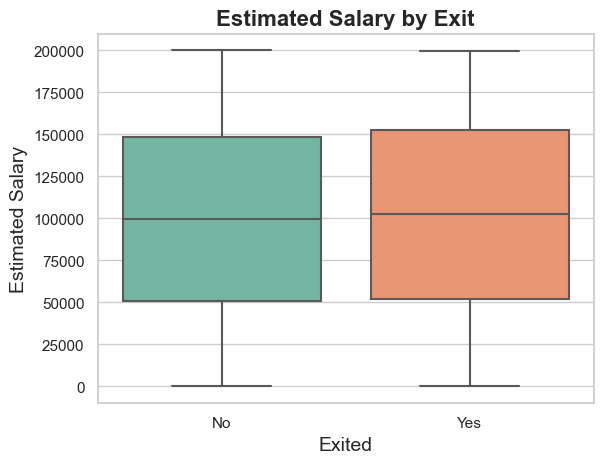

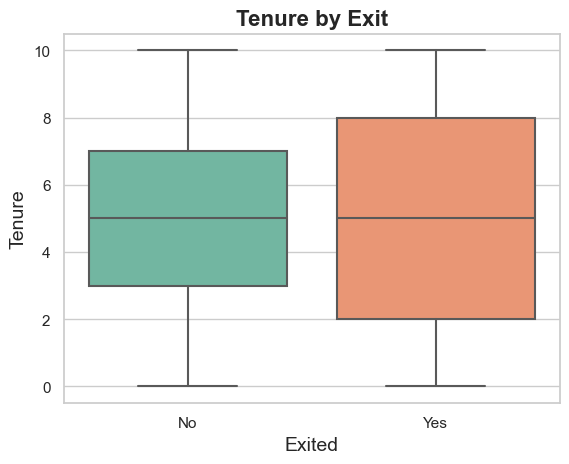

In [500]:
# Set columns to visualize
col_to_visualize = {
    'CreditScore': 'Credit Score', 
    'EstimatedSalary': 'Estimated Salary', 
    'Tenure': 'Tenure'
}

for var in col_to_visualize:
    
    # Box Plot by Exit
    sns.boxplot(x='Exited', y=var, data=data, palette='Set2')
    plt.title(f'{col_to_visualize[var]} by Exit', fontsize=16, fontweight='bold')
    plt.xlabel('Exited', fontsize=14)
    plt.xticks([0, 1], ["No", "Yes"])
    plt.ylabel(col_to_visualize[var], fontsize=14)
    plt.show()

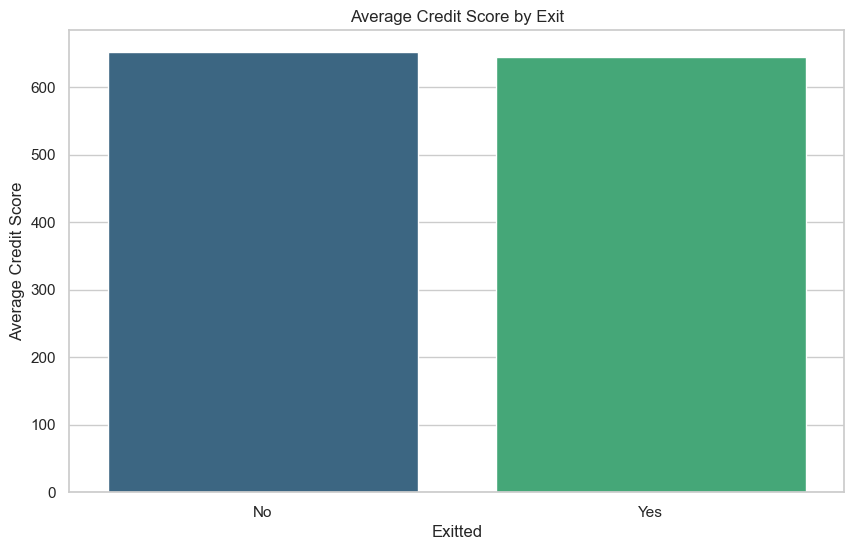

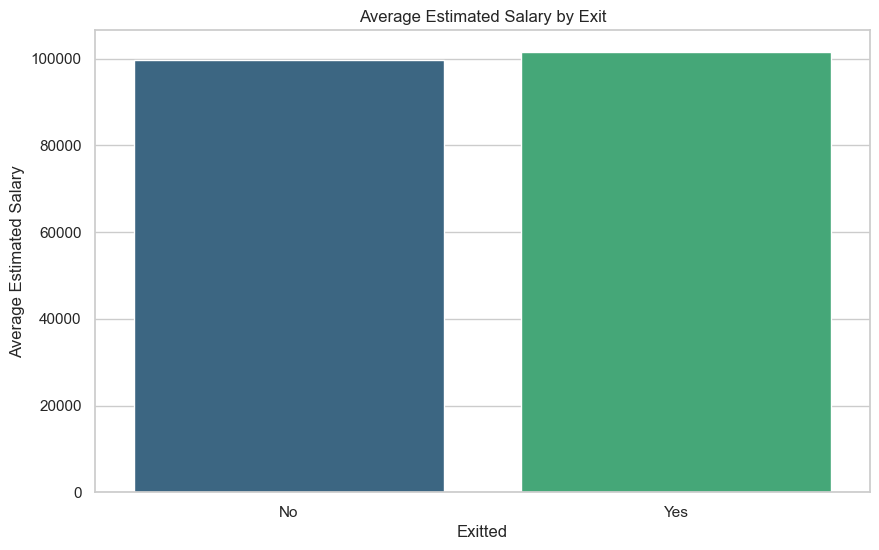

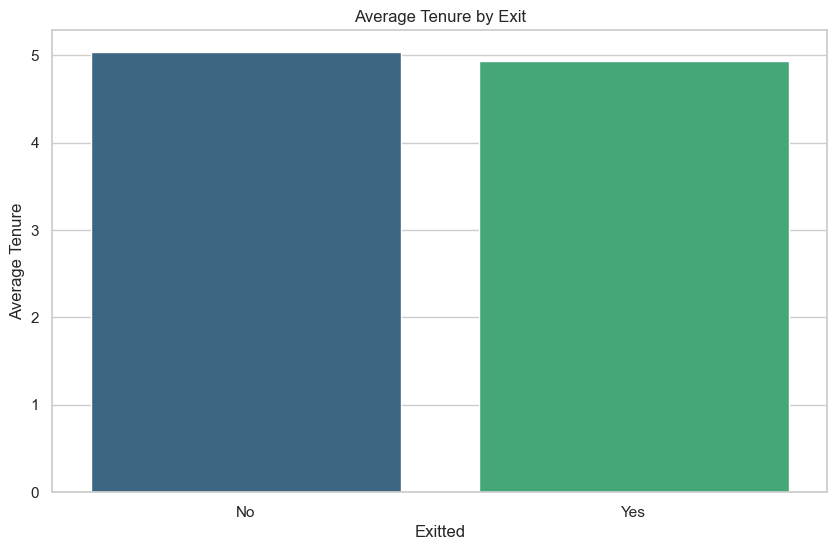

In [501]:
# Set columns to visualize
col_to_visualize = {
    'CreditScore': 'Credit Score', 
    'EstimatedSalary': 'Estimated Salary', 
    'Tenure': 'Tenure'
} # value indicates the proper name of the variable


for var in col_to_visualize:
    
    # Group the data by variable and calculate the average balance
    balance_by_var = data.groupby("Exited")[var].mean().sort_values()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(y=balance_by_var.values, x=balance_by_var.index, palette='viridis')
    plt.title(f'Average {col_to_visualize[var]} by Exit')
    plt.xlabel('Exitted')
    plt.xticks([0, 1], ["No", "Yes"], rotation=0)
    plt.ylabel(f'Average {col_to_visualize[var]}')

plt.show()

#### Not many differences can be seen from the 2 groups (exited, not exited). This supports the correlation heatmap that the correlation of exit with other explanatory variables is low.